In [49]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import numpy as np
import eit
import matplotlib.patches as patches
%matplotlib inline

In [13]:
r = np.ones(128)
theta = np.linspace(-np.pi, np.pi, len(r))

r_sensors = np.ones(8)
theta_sensors = np.linspace(-np.pi, np.pi, 9)[:-1]

In [14]:
points = eit.pol2cart(np.c_[r, theta])
sensor_points = eit.pol2cart(np.c_[r_sensors, theta_sensors])

In [121]:
verts = np.array([
    [-0.4,0.4],
    [0.0, 0.5],
    [0.4, 0.3],
    [0.3, 0.0],
    [0.1, -0.2],
    [-0.2, -0.4],
    [-0.5, -0.2],
    [-0.6, 0.0],
    [-0.4,0.4]
                 ])
verts[:,0] -= 0.1
verts[:,1] += 0.2
codes = [Path.MOVETO] + [Path.CURVE3]*8

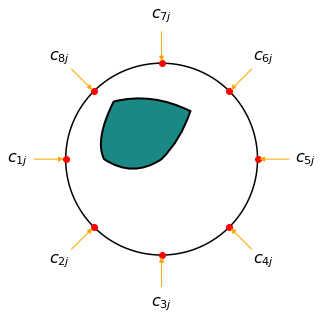

In [138]:
plt.plot(points[:,0], points[:,1], c='black')
plt.gca().set_aspect('equal')
plt.gca().axis('off');

plt.scatter(sensor_points[:,0], sensor_points[:,1], marker='o', zorder=1000, c='red')
path = Path(verts, codes)
patch = patches.PathPatch(path, facecolor='#1A8884', lw=2)
plt.gca().add_patch(patch)
ann_artists = []
for i in xrange(len(sensor_points)):
    x, y = sensor_points[i]
    sensor_theta = theta_sensors[i]
    text_loc = eit.pol2cart(np.c_[[1.5], [sensor_theta]])
    plt.annotate('', xy=(x, y), xytext=(text_loc[0,0]*0.9, text_loc[0,1]*0.9), xycoords='data',
                arrowprops=dict(arrowstyle='-|>', color='orange'), zorder=1500)
    a = plt.text(text_loc[0,0], text_loc[0,1], '$c_{%dj}$' % (i+1), fontsize=16, zorder=5000, horizontalalignment='center', verticalalignment='center')
    ann_artists.append(a)
    
plt.savefig('eit_injection.pdf', bbox_extra_artists=ann_artists, transparent=True, bbox_inches='tight')

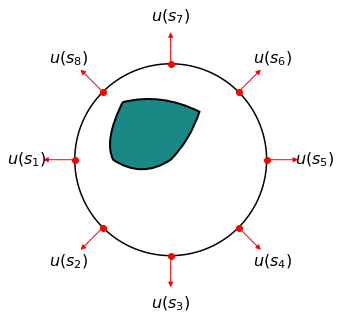

In [139]:
plt.plot(points[:,0], points[:,1], c='black')
plt.gca().set_aspect('equal')
plt.gca().axis('off');

plt.scatter(sensor_points[:,0], sensor_points[:,1], marker='o', zorder=1000, c='red')

path = Path(verts, codes)
patch = patches.PathPatch(path, facecolor='#1A8884', lw=2)
plt.gca().add_patch(patch)
ann_artists = []
for i in xrange(len(sensor_points)):
    x, y = sensor_points[i]
    sensor_theta = theta_sensors[i]
    text_loc = eit.pol2cart(np.c_[[1.5], [sensor_theta]])
    plt.annotate('', xy=(x, y), xytext=(text_loc[0,0]*0.9, text_loc[0,1]*0.9), xycoords='data',
                arrowprops=dict(arrowstyle='<|-', color='red'), zorder=1500)
    a = plt.text(text_loc[0,0], text_loc[0,1], '$u(s_%d)$' % (i+1), fontsize=16, zorder=5000, horizontalalignment='center', verticalalignment='center')
    ann_artists.append(a)

plt.savefig('eit_measurements.pdf', bbox_extra_artists=ann_artists, transparent=True, bbox_inches='tight')